# Mechanism of DM-WM interplay in RNNs

Rotation-addition interaction as a mechanism of DM-WM interplay in RNNs for Figures 8a-f.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import vonmises
from scipy.linalg import circulant

from dynamic_bias import utils
utils.setup_matplotlib()

In [2]:
utils.download_dataset("data/outputs/rnn")

Js = utils.load(f"{utils.ORIGIN}/data/outputs/rnn/trained_J.pickle")
ss = utils.load(f'{utils.ORIGIN}/data/outputs/rnn/results_state_space.pickle')
ss_d = utils.load(f'{utils.ORIGIN}/data/outputs/rnn/results_state_space_durations.pickle')

downloading data/outputs/rnn...
data/outputs/rnn already exists. Skipping download...


---
## Connectivity analysis

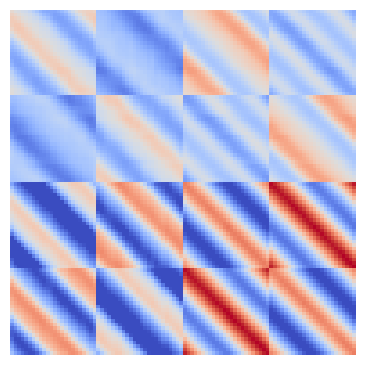

In [3]:
J_hom = {k:np.mean(v,axis=0) for k,v in Js['homogeneous'].items()}
J_het = {k:np.mean(v,axis=0) for k,v in Js['heterogeneous'].items()}

concat  = np.concatenate
m_upper = concat([J_hom['J11'], J_hom['J12']],axis=1)
m_lower = concat([J_hom['J21'], J_hom['J22']],axis=1)
m_total_homo = concat([m_upper,m_lower],axis=0)

plt.figure()
ax = plt.gca()
utils.set_size([3,3])

plt.imshow(m_total_homo, clim=[-0.35,0.35], cmap='coolwarm')
plt.axis('off')
plt.tight_layout()
plt.savefig(f'{utils.DIR_FIGURE}/figs7a_l.pdf',bbox_inches='tight', transparent=True)
plt.show()

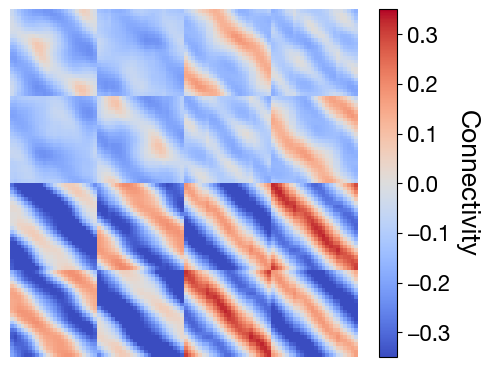

In [4]:
m_upper = concat([J_het['J11'], J_het['J12']],axis=1)
m_lower = concat([J_het['J21'], J_het['J22']],axis=1)
m_total_het = concat([m_upper,m_lower],axis=0)

plt.figure()
ax = plt.gca()
utils.set_size([4,3])

plt.imshow(m_total_het, clim=[-0.35,0.35], cmap='coolwarm')
plt.axis('off')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('Connectivity', rotation=270)

plt.tight_layout()
plt.savefig(f'{utils.DIR_FIGURE}/figs7a_r.pdf',bbox_inches='tight', transparent=True)
plt.show()

In [5]:
def zero_one_norm(vec):
    _min, _max = np.min(vec), np.max(vec)
    return (vec - _min) / (_max - _min)

r_like = utils.TWLT.colors[17]
b_like = utils.TWLT.colors[7]
vx = np.linspace(0,2*np.pi,num=24,endpoint=False)

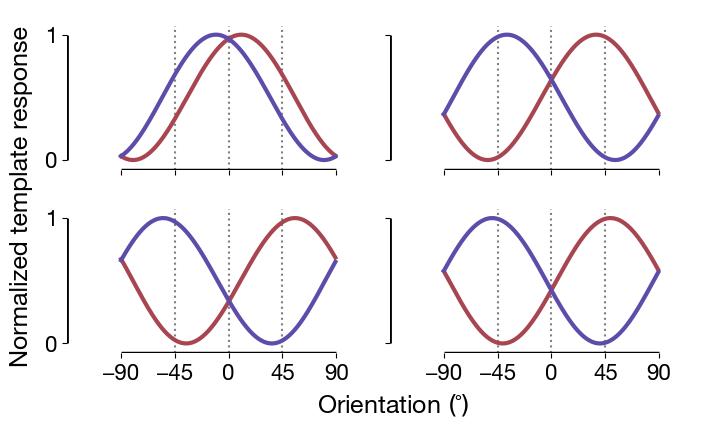

In [10]:
f,ax = plt.subplots(2,2, sharex=True, sharey=True, gridspec_kw={'wspace':0})
utils.set_size([5.5,3.2])

for ii in range(2):
    for jj in range(2):
        ax[ii,jj].axvline(x=0,  ymax=0.9, linestyle='dotted', color='gray')
        ax[ii,jj].axvline(x=-45, ymax=0.9, linestyle='dotted', color='gray')
        ax[ii,jj].axvline(x=45,  ymax=0.9, linestyle='dotted', color='gray')
        ax[ii,jj].set_xlim([-135,135])
        ax[ii,jj].set_ylim([-0.08,1.2])

temp_conv = np.zeros([240,4])
for v_s in range(240):
    circ = circulant(vonmises.pdf(vx,loc=-np.pi+v_s*2*np.pi/240,kappa=0.1))
    temp_conv[v_s,0] = np.sum(J_hom['J11'][:24,:24] * circ) # r_R_ccw to r_R_ccw
    temp_conv[v_s,1] = np.sum(J_hom['J11'][24:,24:] * circ) # r_R_cw to r_R_cw

ax[0,0].plot(np.linspace(-90,90,num=240,endpoint=False), 
             zero_one_norm(temp_conv[:,0]), color=r_like, linewidth=3)
ax[0,0].plot(np.linspace(-90,90,num=240,endpoint=False), 
         zero_one_norm(temp_conv[:,1]), color=b_like, linewidth=3)

temp_conv = np.zeros([240,4])
for v_s in range(240):
    circ = circulant(vonmises.pdf(vx,loc=-np.pi+v_s*2*np.pi/240,kappa=0.1))
    temp_conv[v_s,0] = np.sum(J_hom['J11'][:24,24:] * circ) # r_R_ccw to r_R_cw
    temp_conv[v_s,1] = np.sum(J_hom['J11'][24:,:24] * circ) # r_R_cw to r_R_ccw

ax[0,1].plot(np.linspace(-90,90,num=240,endpoint=False), 
             zero_one_norm(temp_conv[:,0]), color=r_like, linewidth=3)
ax[0,1].plot(np.linspace(-90,90,num=240,endpoint=False), 
             zero_one_norm(temp_conv[:,1]), color=b_like, linewidth=3)


temp_conv = np.zeros([240,4])
for v_s in range(240):
    circ = circulant(vonmises.pdf(vx,loc=-np.pi+v_s*2*np.pi/240,kappa=0.1))
    temp_conv[v_s,0] = np.sum(J_hom['J12'][24:,24:] * circ) # r_R_cw to r_theta
    temp_conv[v_s,1] = np.sum(J_hom['J12'][:24,:24] * circ) # r_R_ccw to r_theta

ax[1,0].plot(np.linspace(-90,90,num=240,endpoint=False), 
             zero_one_norm(temp_conv[:,0]), color=r_like, linewidth=3)
ax[1,0].plot(np.linspace(-90,90,num=240,endpoint=False), 
             zero_one_norm(temp_conv[:,1]), color=b_like, linewidth=3)


vx = np.linspace(0,2*np.pi,num=24,endpoint=False)
temp_conv = np.zeros([240,4])
for v_s in range(240):
    circ = circulant(vonmises.pdf(vx,loc=-np.pi+v_s*2*np.pi/240,kappa=0.1))
    temp_conv[v_s,0] = np.sum(J_hom['J21'][:24,:24] * circ) # r_theta to r_R_ccw
    temp_conv[v_s,1] = np.sum(J_hom['J21'][24:,24:] * circ) # r_theta to r_R_cw

ax[1,1].plot(np.linspace(-90,90,num=240,endpoint=False), 
             zero_one_norm(temp_conv[:,0]), color=r_like, linewidth=3)
ax[1,1].plot(np.linspace(-90,90,num=240,endpoint=False), 
             zero_one_norm(temp_conv[:,1]), color=b_like, linewidth=3)

# plt.xticks([-90,-45,0,45,90], [])
utils.draw_publish_axis(ax[0,0], xrange=(-90,90), yrange=(0,1), xticks=None, yticks=[0,1])
utils.draw_publish_axis(ax[1,0], xrange=(-90,90), yrange=(0,1), xticks=[-90,-45,0,45,90], yticks=[0,1])
utils.draw_publish_axis(ax[0,1], xrange=(-90,90), yrange=(0,1), xticks=None, yticks=[0,1])
utils.draw_publish_axis(ax[1,1], xrange=(-90,90), yrange=(0,1), xticks=[-90,-45,0,45,90], yticks=[0,1])

plt.tight_layout()
if utils.LABEL:
    f.text(0.52, -0.02, r"Orientation $(\!\!^\circ\!\!)$", ha='center', fontsize=18)
    f.text(-0.02, 0.5, "Normalized template response", va='center', rotation='vertical', fontsize=18)

plt.savefig(f'{utils.DIR_FIGURE}/figs7b.pdf',bbox_inches='tight', transparent=True)
plt.show()

---
## Temporal localization

In [7]:
labels = np.linspace(0,2*np.pi,  num=24,endpoint=False)
stims  = np.linspace(-np.pi,np.pi,num=24,endpoint=False)
t1     = 5   # starting time point
s      = 14  # near-cardinal 
cols_r = ['#F7B4BB', '#F46D75', '#BA0001']
cols_b = ['#b3c3f3', '#8da5ed', '#5478e4']
greys  = ['lightgrey', 'darkgrey', 'dimgrey']

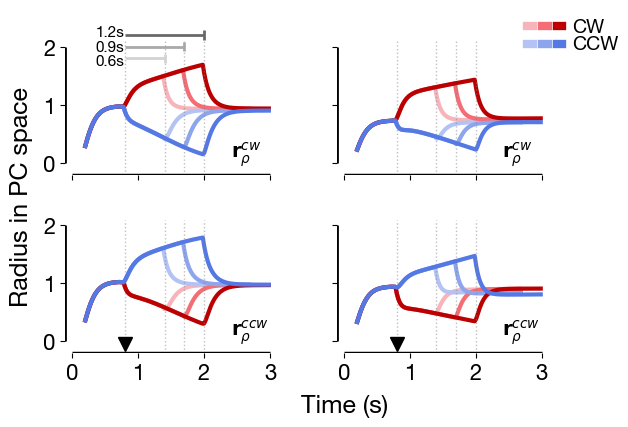

In [20]:
f,ax = plt.subplots(2,2,sharey=True, sharex=True)
utils.set_size([4.8,3.2])

for ii in range(2):
    for jj in range(2):
        ax[ii,jj].axvline(x=0.8, ymax=0.85, linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
        ax[ii,jj].set_ylim([-0.2,2.5])
        ax[ii,jj].set_xlim([-0.1,3.7])

for duri, (durn, t2) in enumerate( zip(['s','m','l'], [120,135,150]) ):
    for i_m, model in enumerate(['r1s_hom', 'r1s_het']):
        radius_cw_w  = ss_d[model]['cw'] [durn][t1:t2, s, 0] # cw population as "winner"
        radius_cw_l  = ss_d[model]['cw'] [durn][t1:t2, s, 1] # cw population as "loser"
        radius_ccw_w = ss_d[model]['ccw'][durn][t1:t2, s, 1] # ccw population as "winner"
        radius_ccw_l = ss_d[model]['ccw'][durn][t1:t2, s, 0] # ccw population as "loser"
        
        radius_cw_w  = np.linalg.norm(radius_cw_w, axis=-1)
        radius_cw_l  = np.linalg.norm(radius_cw_l, axis=-1)
        radius_ccw_w = np.linalg.norm(radius_ccw_w, axis=-1)
        radius_ccw_l = np.linalg.norm(radius_ccw_l, axis=-1)
        
        ax[0,i_m].plot(np.arange(t1,t2)*0.02, radius_cw_w,  color=cols_r[duri], linewidth=3)
        ax[0,i_m].plot(np.arange(t1,t2)*0.02, radius_cw_l,  color=cols_b[duri], linewidth=3)
        ax[1,i_m].plot(np.arange(t1,t2)*0.02, radius_ccw_l, color=cols_r[duri], linewidth=3)
        ax[1,i_m].plot(np.arange(t1,t2)*0.02, radius_ccw_w, color=cols_b[duri], linewidth=3)
        
        ax[0,i_m].axvline(x=t2*0.02-1., ymax=0.85, linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
        ax[1,i_m].axvline(x=t2*0.02-1., ymax=0.85, linestyle='dotted', linewidth=1, color='gray', alpha=0.5)

ax[0,0].text(2.4, 0.1, r'$\mathbf{r}^{cw}_{\rho}$')
ax[1,0].text(2.4, 0.1, r'$\mathbf{r}^{ccw}_{\rho}$')
ax[0,1].text(2.4, 0.1, r'$\mathbf{r}^{cw}_{\rho}$')
ax[1,1].text(2.4, 0.1, r'$\mathbf{r}^{ccw}_{\rho}$')

# legend
from matplotlib.legend_handler import HandlerTuple
markerpar  = {'markeredgewidth': 2, 'markersize': 9, 'linestyle': '-', 'linewidth': 6}
line_red1  = mlines.Line2D([], [], color=cols_r[0], **markerpar)
line_red2  = mlines.Line2D([], [], color=cols_r[1], **markerpar)
line_red3  = mlines.Line2D([], [], color=cols_r[2], **markerpar)
line_blue1 = mlines.Line2D([], [], color=cols_b[0], **markerpar)
line_blue2 = mlines.Line2D([], [], color=cols_b[1], **markerpar)
line_blue3 = mlines.Line2D([], [], color=cols_b[2], **markerpar)
ax[0,1].legend([(line_red1, line_red2, line_red3), (line_blue1, line_blue2, line_blue3)], ['', '', ''],
             handler_map={tuple: HandlerTuple(ndivide=None)},
             frameon=False, loc=(0.72, 0.7), fontsize=16, 
             handletextpad=0.9, handlelength=1.6, labelspacing=-0.1)
ax[0,1].text(0.888, 0.905, 'CW',  ha='left', va='center', transform=f.transFigure, fontsize=14)
ax[0,1].text(0.888, 0.865, 'CCW', ha='left', va='center', transform=f.transFigure, fontsize=14)

#
for i, (h, v) in enumerate( zip([1.8, 2.0, 2.2], [1.4, 1.7, 2.0]) ):
    ax[0,0].hlines(h, 0.8, v, color=greys[i], linewidth=2)
    ax[0,0].vlines(v, h-0.08, h+0.08, color=greys[i], linewidth=2)

ax[0,0].text(0.35, 2.25, '1.2s', fontsize=11, va='center', ha='left')
ax[0,0].text(0.35, 2.00, '0.9s', fontsize=11, va='center', ha='left')
ax[0,0].text(0.35, 1.75, '0.6s', fontsize=11, va='center', ha='left')
ax[1,0].plot(0.8, -0.05, marker='v', linestyle='-', color='k', markersize=10)
ax[1,1].plot(0.8, -0.05, marker='v', linestyle='-', color='k', markersize=10)

for ii in range(2):
    for jj in range(2):
        utils.draw_publish_axis(ax[ii,jj], xrange=(0,3), yrange=(0,2), xticks=[0,1,2,3], yticks=[0,1,2])

if utils.LABEL:
    f.text(0.52, -0.02, "Time (s)", ha='center', fontsize=18)
    f.text(-0.02, 0.5, "Radius in PC space", va='center', rotation='vertical', fontsize=18)

plt.savefig(f'{utils.DIR_FIGURE}/figs7c.pdf',bbox_inches='tight', transparent=True)
plt.show()

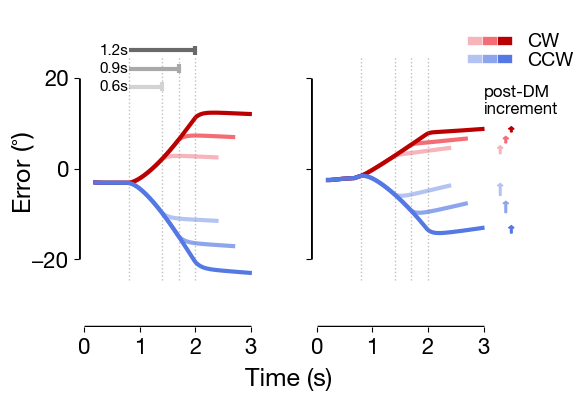

In [21]:
t1 = 10   # starting time point
greys = ['lightgrey', 'darkgrey', 'dimgrey']
f,ax = plt.subplots(1,2, sharey=True)
utils.set_size([4.5,3])

for duri, (durn, t2) in enumerate( zip(['s','m','l'], [120,135,150]) ):
    for i_m, model in enumerate(['r2s_hom', 'r2s_het']):
        traj = np.arctan2( ss_d[model][durn][...,1], ss_d[model][durn][...,0] )
        traj = utils.wrap( traj - np.arctan2(ss['ref_input'][...,1], ss['ref_input'][...,0])[:,None] )
        traj_cw  = utils.dir2ori(traj[t1:,:,0])
        traj_ccw = utils.dir2ori(traj[t1:,:,1])
        
        ax[i_m].plot(np.arange(t1,t2)*0.02, traj_cw[:,s],  color=cols_r[duri], linewidth=3)
        ax[i_m].plot(np.arange(t1,t2)*0.02, traj_ccw[:,s], color=cols_b[duri], linewidth=3)
        ax[i_m].axvline(x=t2*0.02-1., ymin=0.15, ymax=0.85, linestyle='dotted', linewidth=1, color='gray', alpha=0.5)

    ax[0].vlines(t2*0.02-1, 18+4*duri-1.0, 18+4*duri+1.0, color=greys[duri], linewidth=3)
    ax[0].hlines(18+4*duri, 0.8, t2*0.02-1, color=greys[duri], linewidth=3)
    ax[0].text(0.28, 18+4*duri, ['0.6s','0.9s','1.2s'][duri], fontsize=11, va='center', ha='left')
    ax[1].arrow(3.3+0.1*duri, 
                traj_cw[ t2-50,s], 0, (traj_cw[ -1,s]-traj_cw[ t2-50,s]), 
                color=cols_r[duri], head_width=0.1, head_length=0.5, width=0.03, zorder=3)
    ax[1].arrow(3.3+0.1*duri, 
                traj_ccw[t2-50,s], 0, (traj_ccw[-1,s]-traj_ccw[t2-50,s]), 
                color=cols_b[duri], head_width=0.1, head_length=0.5, width=0.03, zorder=3)

# legend
from matplotlib.legend_handler import HandlerTuple
markerpar  = {'markeredgewidth': 2, 'markersize': 9, 'linestyle': '-', 'linewidth': 6}
line_red1  = mlines.Line2D([], [], color=cols_r[0], **markerpar)
line_red2  = mlines.Line2D([], [], color=cols_r[1], **markerpar)
line_red3  = mlines.Line2D([], [], color=cols_r[2], **markerpar)
line_blue1 = mlines.Line2D([], [], color=cols_b[0], **markerpar)
line_blue2 = mlines.Line2D([], [], color=cols_b[1], **markerpar)
line_blue3 = mlines.Line2D([], [], color=cols_b[2], **markerpar)
ax[1].legend([(line_red1, line_red2, line_red3), (line_blue1, line_blue2, line_blue3)], ['', '', ''],
             handler_map={tuple: HandlerTuple(ndivide=None)},
             frameon=False, loc=(0.72, 0.78), fontsize=16, 
             handletextpad=0.9, handlelength=1.6, labelspacing=-0.1)
ax[1].text(0.89, 0.865, 'CW',  ha='left', va='center', transform=f.transFigure, fontsize=14)
ax[1].text(0.89, 0.815, 'CCW', ha='left', va='center', transform=f.transFigure, fontsize=14)
ax[1].text(3, 12, 'post-DM\nincrement', fontsize=12)

for i in range(2):
    ax[i].axvline(x=0.8, ymin=0.15, ymax=0.85, linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
    ax[i].set_xlim([-0.1,3.7])
    ax[i].set_ylim([-35,35])
    utils.draw_publish_axis(ax[i], xrange=(0,3), yrange=(-20,20), xticks=[0,1,2,3], yticks=[-20,0,20])

if utils.LABEL:
    f.text(0.48, -0.02, "Time (s)", ha='center', fontsize=18)
    f.text(0.00, 0.53, r"Error $(\!\!^\circ\!\!)$", va='center', rotation='vertical', fontsize=18)

plt.tight_layout()
plt.savefig(f'{utils.DIR_FIGURE}/figs7d.pdf',bbox_inches='tight', transparent=True)
plt.show()